In [84]:
import py2cytoscape.cytoscapejs as renderer
import random
import requests
import sys
import networkx as nx
import pprint

from py2cytoscape.data.cyrest_client import CyRestClient

#args = sys.argv[1:]

seed = 1

random.seed(seed)

graph_size = 100
graph_size_range = graph_size / 2

edge_num_limit = 3
hub_node_prob = 0.1

num_v = random.randrange(graph_size - graph_size_range, graph_size + graph_size_range)

g = nx.MultiDiGraph()

for i in range(num_v):
    i_hub = False
    o_hub = False
    if random.random() < hub_node_prob:
        i_hub = True
    if random.random() < hub_node_prob:
        o_hub = True
    g.add_node(i, i_hub=i_hub, o_hub=o_hub)


#
# networkx: v1.11
#
for x in g:
    tmp = []
    e_min = 0
    e_max = edge_num_limit
    if g.nodes[x]['o_hub']:
        e_min = edge_num_limit * 2
        e_max = edge_num_limit * 3
    for i in range(random.randrange(e_min, e_max)):
        y = random.randrange(0, num_v)
        if x != y and y not in tmp:
            tmp.append(y)
            g.add_edge(x,y)

for y in g:
    if not g.nodes[y]['i_hub']:
        continue
    for i in range(edge_num_limit):
        x = random.randrange(0, num_v)
        if g.has_edge(x,y):
            continue
        if x == y:
            continue
        g.add_edge(x,y)

for i in g:
    n = g.nodes[i]
    if n['i_hub'] and n['o_hub']:
        n['color'] = 'red'
    elif n['i_hub']:
        n['color'] = 'blue'
    elif n['o_hub']:
        n['color'] = 'green'
    else:
        n['color'] = '#555555'

#for x in g:
#    if g.nodes[x]['o_hub']:
#        for y in x:
#            print(dir(x))

#print(g[0])

for e in g.edges.data():
    x = e[0]
    y = e[1]
    attr = e[2]
    if g.nodes[x]['o_hub'] and g.nodes[y]['i_hub']:
        attr['color'] = 'red'
    elif g.nodes[x]['o_hub']:
        attr['color'] = 'green'
    elif g.nodes[y]['i_hub']:
        attr['color'] = 'blue'
    else:
        attr['color'] = '#555555'

    #e[2]['color'] = 'red'

'''
for x in range(num_v):
    tmp = []
    e_min = 0
    e_max = edge_num_limit
    if g.nodes[x]['o_hub']:
        e_min = edge_num_limit * 2
        e_max = edge_num_limit * 3
    for i in range(random.randrange(e_min, e_max)):
        y = random.randrange(0, num_v)
        if x != y and y not in tmp:
            tmp.append(y)
            g.add_edge(x,y)

for y in g.nodes_iter():
    if not g.node[y]['i_hub']:
        continue
    for i in range(edge_num_limit):
        x = random.randrange(0, num_v)
        if y in g.edge[x]:
            continue
        if x == y:
            continue
        g.add_edge(x,y)
'''

print('Number of Nodes: ' + str(g.number_of_nodes()))
print('Number of Edges: ' + str(g.number_of_edges()))

Number of Nodes: 67
Number of Edges: 104


/home/kakei/anaconda3/envs/play-with-graph/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/kakei/anaconda3/envs/play-with-graph/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/kakei/anaconda3/envs/play-with-graph/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


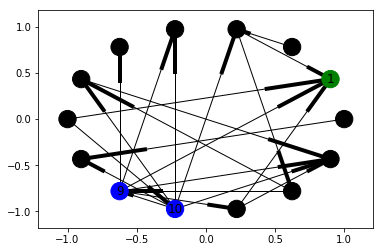

In [54]:
import matplotlib.pyplot as plt

node_color = list()
for i in g.nodes_iter():
    n = g.node[i]
    if n['i_hub'] and n['o_hub']:
        node_color.append('red')
    elif n['i_hub']:
        node_color.append('green')
    elif n['o_hub']:
        node_color.append('blue')
    else:
        node_color.append('black')

fig = plt.figure()
pos = nx.circular_layout(g)

nx.draw_networkx(g, pos, node_color=node_color)

In [85]:
from pyvis.network import Network

net = Network(directed=True, notebook=True, height='700px', width = '100%')

net.from_nx(g)
net.show('graph.html')

In [ ]:
cy = CyRestClient()
nw = cy.network.create(name='My Network', collection='My network collection')

g_cy = cy.network.create_from_networkx(g)

layout = cy.style.create('Directed')
cy.layout.apply(name='cose', network=g_cy)
cy.style.apply(layout, network=g_cy)
cy.edgebundling.apply(g_cy)

In [47]:
default_style = cy.style.create('default')

new_defaults = {
    # Node defaults
    'NODE_BORDER_PAINT': '#919191',
    'NODE_FILL_COLOR': 'white',
    'NODE_SIZE': 25,
    'NODE_BORDER_WIDTH': 3,
    'NODE_TRANSPARENCY': 255,
    'NODE_LABEL_COLOR': '#3399FF',
    'NODE_SHAPE': 'Ellipse',
    
    # Edge defaults
    'EDGE_COLOR': '#919191',
    'EDGE_WIDTH': 3,
    'EDGE_STROKE_UNSELECTED_PAINT': '#919191',
    'EDGE_TARGET_ARROW_UNSELECTED_PAINT': '#919191',
    'EDGE_LINE_TYPE': 'EQUAL_DASH',
    'EDGE_TRANSPARENCY': 255,
    'EDGE_TARGET_ARROW_SHAPE': 'ARROW',
    
    # Network defaults
    'NETWORK_BACKGROUND_PAINT': 'white'
}

default_style.update_defaults(new_defaults)

cy.style.apply(default_style, network=g_cy)

In [6]:
print(view)

{'data': {'__Annotations': [], 'selected': True, 'shared_name': 'From cyREST', 'name': 'From cyREST', 'SUID': 27066}, 'generated_by': 'cytoscape-3.8.2', 'format_version': '1.0', 'elements': {'edges': [{'selected': False, 'data': {'BEND_MAP_ID': 27120, 'selected': False, 'shared_interaction': '0', 'SUID': 27120, 'interaction': '0', 'source': '27097', 'target_original': '4', 'id': '27120', 'target': '27080', 'source_original': '21'}}, {'selected': False, 'data': {'BEND_MAP_ID': 27119, 'selected': False, 'shared_interaction': '0', 'SUID': 27119, 'interaction': '0', 'source': '27095', 'target_original': '15', 'id': '27119', 'target': '27091', 'source_original': '19'}}, {'selected': False, 'data': {'BEND_MAP_ID': 27118, 'selected': False, 'shared_interaction': '0', 'SUID': 27118, 'interaction': '0', 'source': '27095', 'target_original': '21', 'id': '27118', 'target': '27097', 'source_original': '19'}}, {'selected': False, 'data': {'BEND_MAP_ID': 27117, 'selected': False, 'shared_interaction